<a href="https://colab.research.google.com/github/faizanroshan/Machine-Learning/blob/main/Air-Quality-Based-Routing/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import pickle 

from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
df = pd.read_csv('city_day.csv')

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,20259.000000,14913.000000,21272.000000,21314.000000,20396.000000,15774.000000,22463.000000,20990.000000,20876.000000,20105.000000,18206.000000,8580.000000,20408.000000
mean,68.303614,122.561411,17.589556,29.102762,33.975086,26.591953,2.496435,14.009233,34.512251,2.963002,8.096887,2.596112,170.921011
std,64.142521,91.343183,22.666466,24.275804,32.416548,27.151310,7.669468,18.609088,20.798985,9.698108,15.144094,5.635406,147.161630
min,0.160000,0.210000,0.020000,0.010000,0.000000,0.010000,0.000000,0.210000,0.010000,0.000000,0.000000,0.000000,18.000000
25%,30.180000,59.790000,5.960000,12.560000,14.237500,10.520000,0.490000,5.690000,19.660000,0.140000,0.550000,0.100000,82.000000
50%,49.850000,99.690000,9.860000,22.160000,24.320000,19.315000,0.870000,9.070000,31.300000,1.050000,2.690000,0.750000,120.000000
75%,81.750000,155.070000,19.230000,37.770000,42.030000,33.867500,1.430000,14.280000,45.240000,2.910000,8.450000,2.600000,215.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,391.880000,411.520000,137.450000,2049.000000


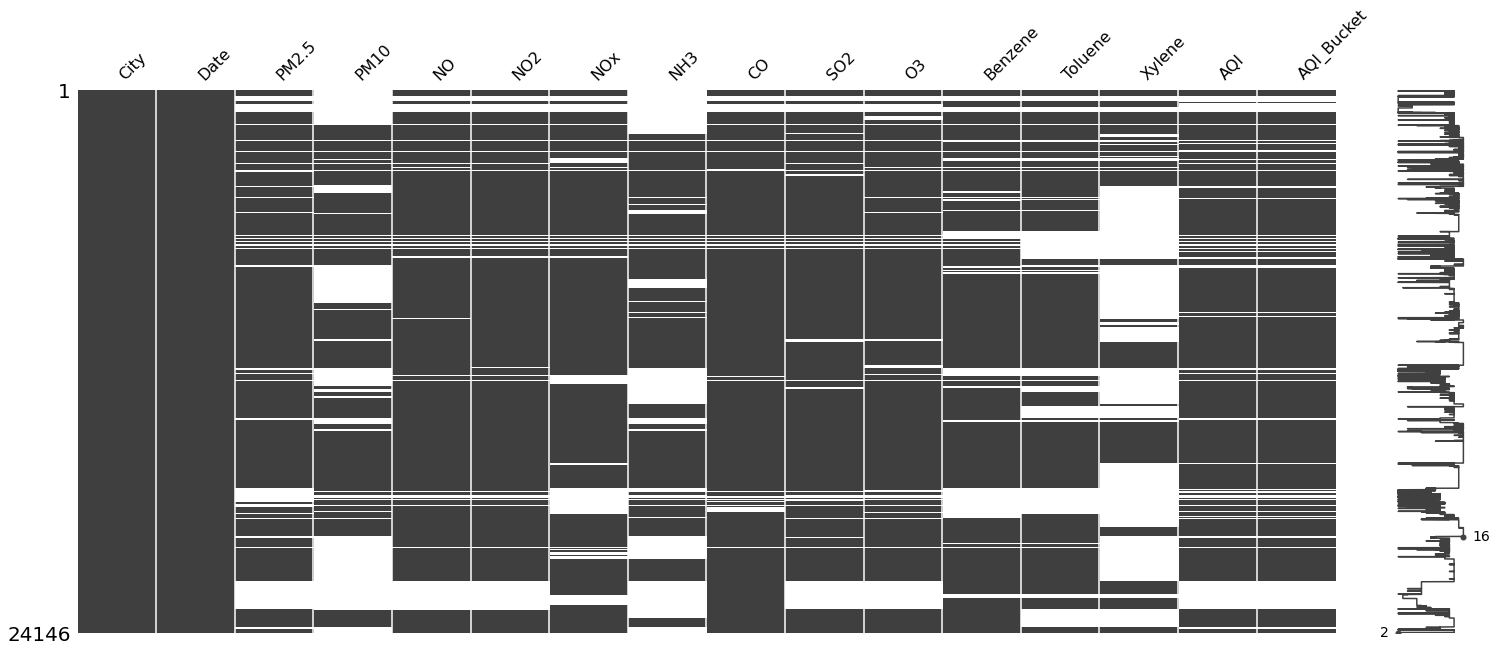

In [ ]:
msno.matrix(df)

In [ ]:
# drop columns with more than 10k null values and nominal column
df.drop(columns=['PM10', 'Xylene', 'NH3', 'AQI_Bucket'], inplace=True)

In [ ]:
for col in df.columns:
    
    if df[col].isna().sum() != 0 and df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] =  pd.to_datetime(df['Date']).dt.month
df['Year'] =  pd.to_datetime(df['Date']).dt.year
df.drop(columns='Date', inplace=True)

In [ ]:
df['City'] = df['City'].str.lower()

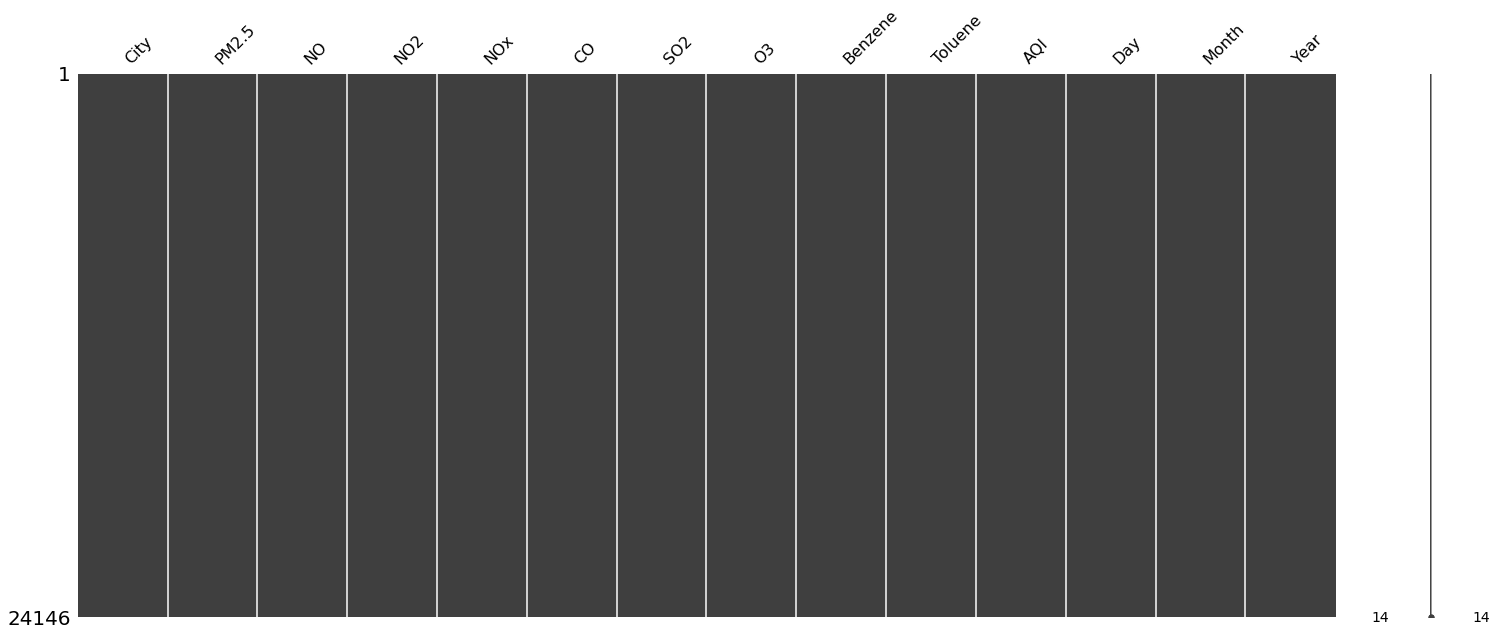

In [ ]:
msno.matrix(df)

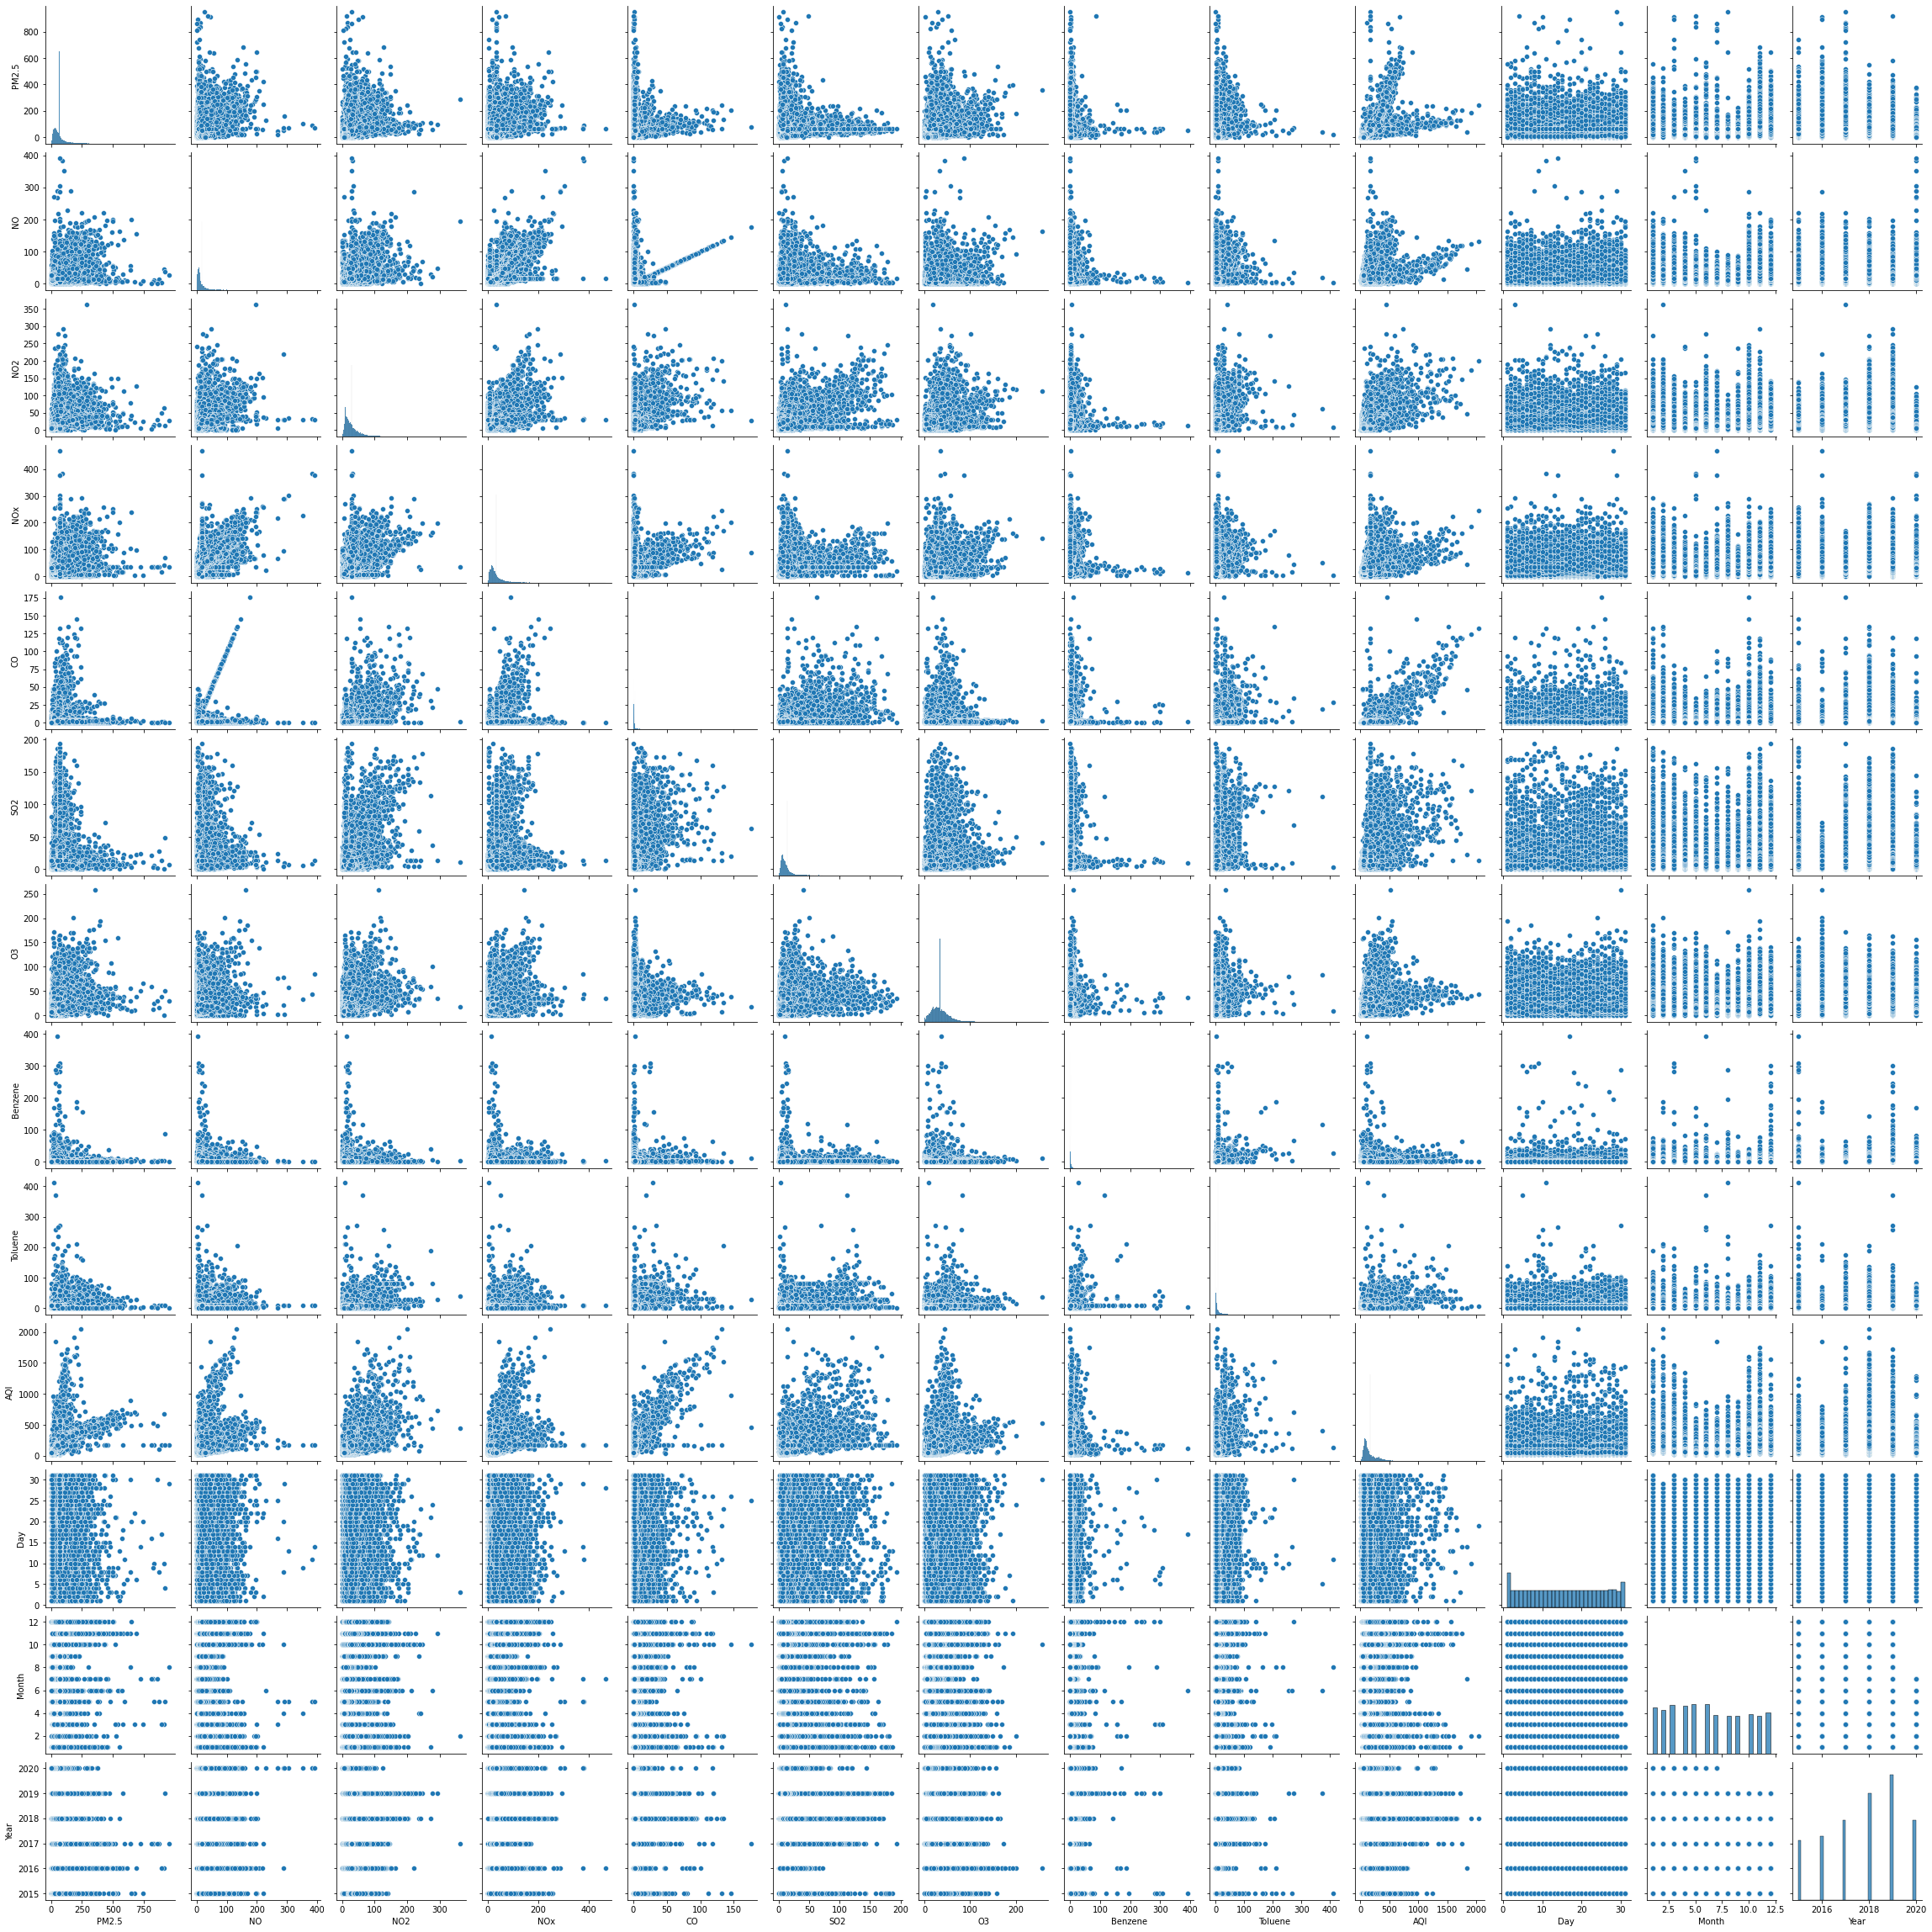

In [ ]:
sns.pairplot(df[df.columns])

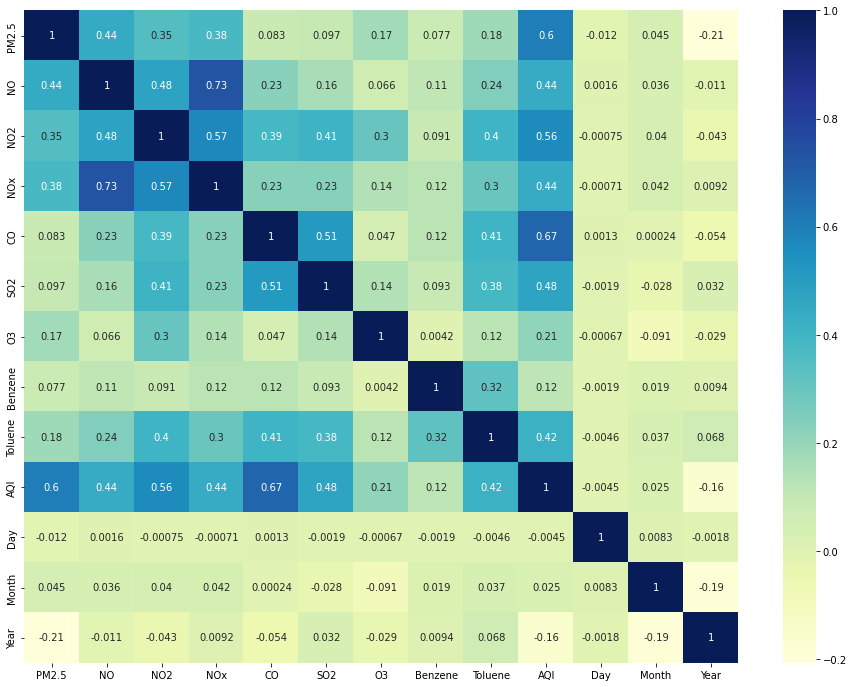

In [ ]:
figure(figsize=(16, 12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

In [ ]:
df

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,Day,Month,Year
0,0,68.303614,0.920000,18.220000,17.150000,0.920000,27.640000,133.360000,0.000000,0.020000,170.921011,1,1,2015
1,0,68.303614,0.970000,15.690000,16.460000,0.970000,24.550000,34.060000,3.680000,5.500000,170.921011,2,1,2015
2,0,68.303614,17.400000,19.300000,29.700000,17.400000,29.070000,30.700000,6.800000,16.400000,170.921011,3,1,2015
3,0,68.303614,1.700000,18.480000,17.970000,1.700000,18.590000,36.080000,4.430000,10.140000,170.921011,4,1,2015
4,0,68.303614,22.100000,21.420000,37.760000,22.100000,39.330000,39.310000,7.010000,18.890000,170.921011,5,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24141,21,175.650000,49.020000,30.560000,79.590000,2.680000,6.450000,19.270000,0.370000,2.460000,327.000000,4,3,2016
24142,21,247.520000,67.390000,25.740000,93.130000,1.670000,5.760000,15.350000,0.420000,1.610000,390.000000,5,3,2016
24143,21,205.000000,47.690000,18.500000,66.190000,1.260000,1.740000,3.120000,0.380000,1.250000,376.000000,6,3,2016
24144,21,94.470000,33.580000,23.430000,57.000000,1.050000,6.810000,19.850000,0.200000,0.860000,210.000000,7,3,2016


In [ ]:
X = df.drop(columns=['AQI', 'Day', 'Month', 'Year'], axis=1)
Y = df['AQI']

In [ ]:
# without Normalisation
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
x_train

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene
191,0,149.030000,11.490000,0.160000,11.650000,11.49,10.070000,7.270000,1.710000,5.720000
15127,14,34.000000,6.420000,8.370000,14.790000,0.72,6.210000,10.130000,0.110000,0.670000
7100,6,123.520000,31.340000,28.240000,52.660000,2.56,9.270000,6.940000,0.000000,8.096887
6279,4,20.160000,4.640000,15.310000,15.430000,0.65,6.880000,16.900000,0.730000,2.660000
3949,3,48.850000,7.770000,9.490000,17.260000,0.17,12.120000,22.140000,4.400000,1.150000
...,...,...,...,...,...,...,...,...,...,...
18868,16,68.303614,25.100000,10.800000,33.975086,1.68,28.080000,30.120000,2.963002,8.096887
23529,20,7.970000,18.230000,9.890000,27.330000,0.40,8.600000,13.840000,1.800000,8.096887
22836,20,68.303614,17.589556,29.102762,33.975086,0.00,14.009233,34.512251,0.000000,0.000000
16996,15,48.420000,9.580000,17.690000,27.270000,0.52,8.710000,19.370000,0.430000,1.470000


In [ ]:
linear_regression = LinearRegression()
linear_regression_model = linear_regression.fit(x_train, y_train)
linear_regression.score(x_test, y_test)

0.7404731451809196

In [ ]:
filename = 'air_quality_index.sav'
pickle.dump(linear_regression_model, open(filename, 'wb'))

# DEEP LEARNING

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

In [ ]:
normalized_df=(df-df.mean())/df.std()

In [ ]:
X = normalized_df.drop(['AQI'], axis=1)
Y = normalized_df['AQI']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
def build_model():
    
    model = keras.Sequential([
        
        layers.Dense(256, activation=tf.nn.tanh, input_shape=[x_train.shape[1]],kernel_regularizer='l1'),
        layers.Dense(256//2, activation=tf.nn.tanh),
        layers.Dense(256//4, activation=tf.nn.tanh),
        layers.Dense(256//8, activation=tf.nn.tanh),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss=['mse'], optimizer=optimizer, metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 256)               3584      
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 46,849
Trainable params: 46,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = x_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.24694836],
       [ 0.06740946],
       [-0.22064637],
       [-0.16668972],
       [-0.44396168],
       [-0.0958306 ],
       [-0.01927632],
       [-0.10830283],
       [-0.35859108],
       [ 0.19786307]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs):
        
        if epoch % 10 == 0: 
            print(' ')
        print('.', end='')
        
EPOCHS = 100

history = model.fit(
    x_train, y_train, epochs=EPOCHS, verbose=0,
    callbacks=[PrintDot()]
)

 
.......... 
.......... 
.......... 
.......... 
.......... 
.......... 
.......... 
.......... 
.......... 
..........

### Model Loss Plot Mean Absolute Error and Mean Square Error

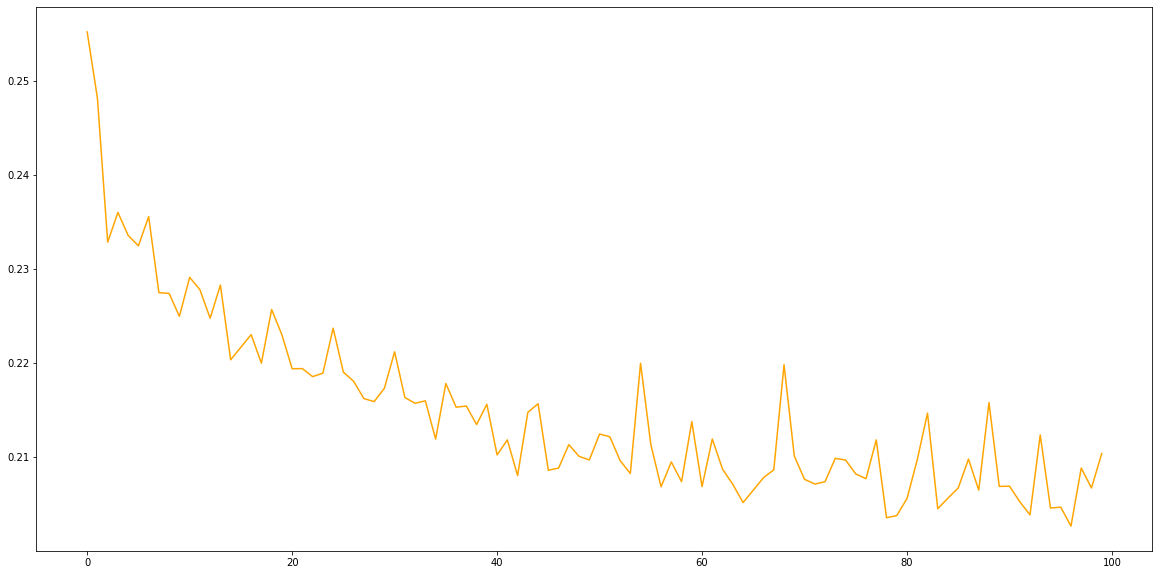

In [ ]:
figure = plt.figure(figsize=(20, 10))
plt.plot(history.history['mae'], color='orange')

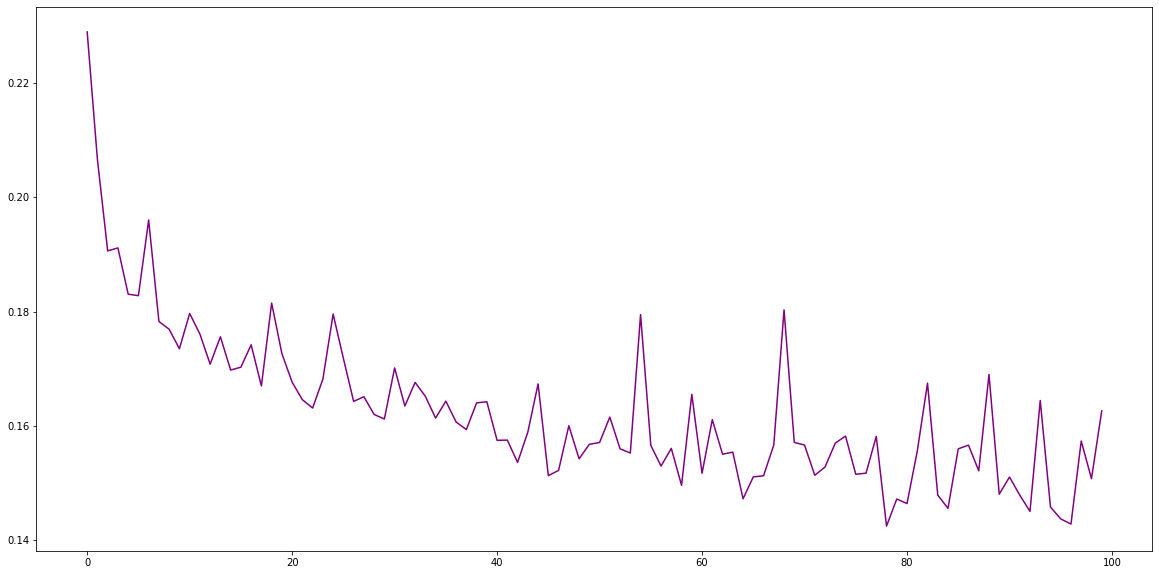

In [ ]:
figure = plt.figure(figsize=(20, 10))
plt.plot(history.history['mse'], color='purple')

In [ ]:
model.evaluate(x_test, y_test)

189/189 [==============================] - 1s 2ms/step - loss: 0.2033 - mae: 0.2029 - mse: 0.1682


[0.2033398449420929, 0.20291705429553986, 0.1681719571352005]

In [ ]:
y_pred = model.predict(x_test)
y_test = np.array(y_test)

# Accuracy of the deep learning model

In [ ]:
print("test accuracy: ", r2_score(y_test, y_pred) * 100)
print("train accuracy: ", r2_score(y_train, model.predict(x_train))*100)

test accuracy:  83.49966773774302
train accuracy:  86.07319780345854


# Building the routing module

Note: As of now we are having trouble finding the right api for computing the routes.

Alternate approach implemented i.e., 
As of now, we will we will try to replicate the data.

Step 1: Get all the cities in the form graph (ajacency matrix)

Step 2: As of now, we have a adjacency matrix with time as their weight on the edges.

Step 3: For every edge of the graph (route) we compute new weighted edges by using a custom function.

## $ f(z) = \frac{1}{1 + e^-(g(x) * α + y * β)} $

Step 4: The above mentioned function is as follows.

It contains two parameters. 

*   Relative AQI (Air Quality Index)
*   Time taken for commute between two cities.

    let city-1 be $x_{1}$ & let city-2 be $x_{2}$
    if g(x) is the relative 

    $ g(x_{1}, x_{2}) $ = Relative Air Quality Index (AQI) of two nodes (cities)
    y = Time taken for covering distance between two nodes (cities).
    
    $ g(x_{1}, x_{2}) = | x_{2} - x_{1} | $

    Let us consider $ g(x_{1}, x_{2}) $ as g(x) 

    The final equation is $ f(g(x1, x2), y) $

    $ f(g(x1, x2), y) = f(z) $

    $ α $ is the pollution parameter weight

    $ β $ is the time parameter weight







### Three Dimensional Plot of the custom function

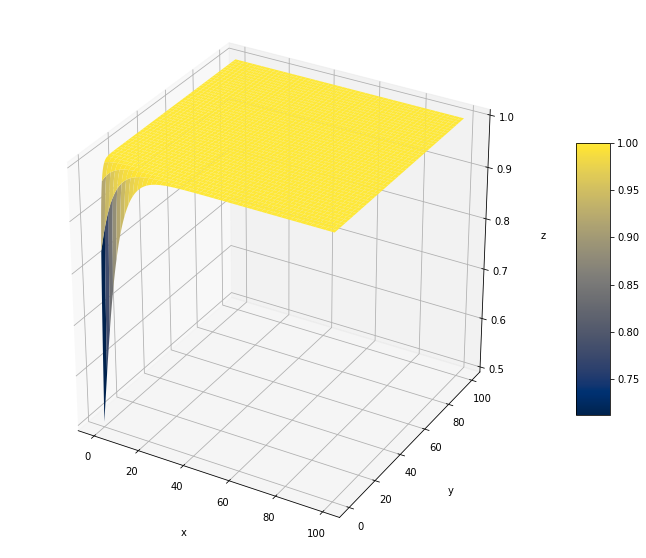

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0,100, 0.2)
y = np.arange(0, 100, 0.2)

alpha = 0.2
beta = 0.8

X, Y = np.meshgrid(x, y)
Z = 1 / (1 + np.exp(-1 * (X*alpha + Y*beta)))

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [ ]:
random_AQI = np.random.choice(y_train, 10)


array([-7.23777909e-01, -3.76379927e-01, -6.49863445e-01,  7.84077161e-01,
       -6.49863445e-01, -2.10077542e-16, -7.60735141e-01, -7.01603570e-01,
       -8.05083820e-01,  1.07973502e+00])

In [254]:
import joblib
joblib.dump(model, 'AQI_Model.pkl')

INFO:tensorflow:Assets written to: ram://2d581118-1a76-420a-9796-eb30961c3262/assets


INFO:tensorflow:Assets written to: ram://2d581118-1a76-420a-9796-eb30961c3262/assets


['AQI_Model.pkl']